In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import os
import datetime as dt
import numpy as np
from copy import deepcopy
import seaborn as sns
from scipy.stats import linregress

In [14]:
files = os.listdir("data")
# Sort dates
dates = [dt.datetime.strptime(re.findall(r'\d{4}-\d{2}-\d{2}',f)[0],'%Y-%m-%d') for f in files]
dates = sorted(dates,reverse=False)
dates = [i.strftime('%Y-%m-%d') for i in dates]

dfs_raw = {d: pd.read_csv(f'data/worldometers-{d}.tsv',sep="\t") for d in dates}

In [15]:
dfs_raw[dates[0]]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,80849953,53838.0,982032.0,1389.0,54136964.0,191175.0,25730957.0,7025.0,241891.0,2938.0,954367702.0,2855321.0,3.342418e+08,North America
1,India,42951556,6396.0,514620.0,201.0,42367070.0,13450.0,69866.0,8944.0,30622.0,367.0,770050005.0,548999.0,1.402643e+09,Asia
2,Brazil,28906214,64054.0,650646.0,594.0,26810286.0,142276.0,1445282.0,8318.0,134397.0,3025.0,63776166.0,296522.0,2.150808e+08,South America
3,France,22900531,60225.0,138942.0,180.0,21364892.0,131190.0,1396697.0,2484.0,349549.0,2121.0,246629975.0,3764506.0,6.551456e+07,Europe
4,UK,19074441,45571.0,161898.0,194.0,17537214.0,NaN,1375329.0,279.0,278536.0,2364.0,484240712.0,7071156.0,6.848113e+07,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Western Sahara,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,16.0,2.0,NaN,NaN,6.218230e+05,Africa
222,MS Zaandam,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Marshall Islands,7,NaN,NaN,NaN,7.0,NaN,0.0,NaN,117.0,NaN,NaN,NaN,5.985600e+04,Australia/Oceania
224,Saint Helena,2,NaN,NaN,NaN,2.0,NaN,0.0,NaN,327.0,NaN,NaN,NaN,6.107000e+03,Africa


In [16]:
dfs = deepcopy(dfs_raw)

In [17]:
dfs_raw[dates[0]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country,Other     226 non-null    object 
 1   TotalCases        226 non-null    int64  
 2   NewCases          176 non-null    float64
 3   TotalDeaths       217 non-null    float64
 4   NewDeaths         119 non-null    float64
 5   TotalRecovered    218 non-null    float64
 6   NewRecovered      144 non-null    float64
 7   ActiveCases       218 non-null    float64
 8   Serious,Critical  164 non-null    float64
 9   Tot Cases/1M pop  224 non-null    float64
 10  Deaths/1M pop     215 non-null    float64
 11  TotalTests        210 non-null    float64
 12  Tests/1M pop      210 non-null    float64
 13  Population        224 non-null    float64
 14  Continent         224 non-null    object 
dtypes: float64(12), int64(1), object(2)
memory usage: 26.6+ KB


In [18]:
dfs_raw[dates[0]][dfs_raw[dates[0]].Continent.isna()]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
211,Diamond Princess,712,NaN,13.0,NaN,699.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,MS Zaandam,9,NaN,2.0,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These two lines has a lot of missing values so we remove them instead of filling them with default value.

In [19]:
for d in dates:
    dfs[d] = dfs[d][dfs[d]['Continent'].notna()]
    dfs[d] = dfs[d].fillna(0)

In [20]:
dfs0 = dfs[dates[0]]

### Total cases ~ Active cases

Does active cases and total cases has a relationship?

### Total cases

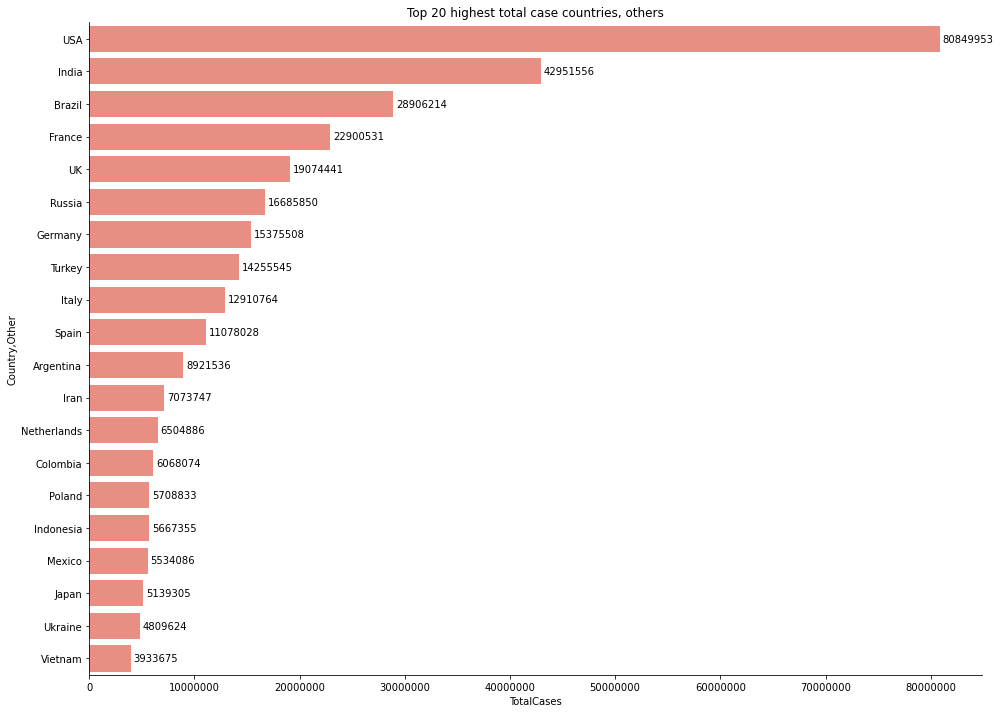

In [21]:
fig, ax = plt.subplots(figsize= (16,12))
sns.barplot(data=dfs0.head(20), x='TotalCases', y='Country,Other', color='salmon', ax=ax)
ax.bar_label(ax.containers[0], fmt='%d', padding=3)
ax.spines[['right','top']].set_visible(False)
ax.ticklabel_format(style='plain', axis='x') # remove scientific notation for ticks label
ax.set_title('Top 20 highest total case countries, others')
plt.show()

### Active cases

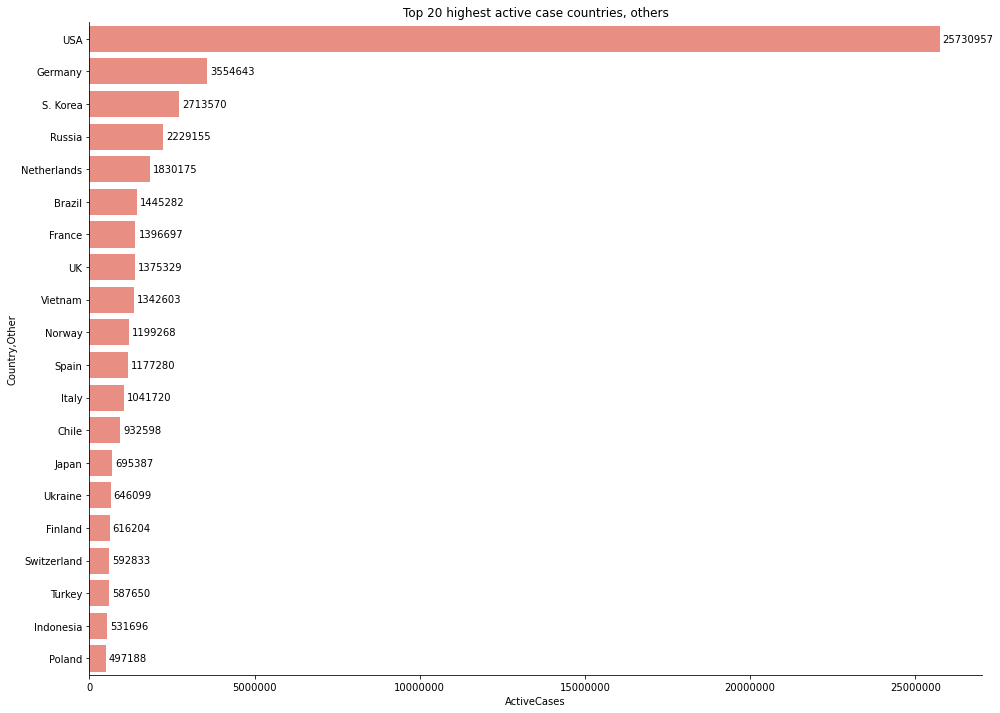

In [22]:
fig, ax = plt.subplots(figsize= (16,12))
sns.barplot(data=dfs0.nlargest(n=20, columns=['ActiveCases']), x='ActiveCases', y='Country,Other', color='salmon', ax=ax)
ax.bar_label(ax.containers[0], fmt='%d', padding=3)
ax.spines[['right','top']].set_visible(False)
ax.ticklabel_format(style='plain', axis='x') # remove scientific notation for ticks label
ax.set_title('Top 20 highest active case countries, others')
plt.show()

### Comment

- The USA is current top the chart around 25 million cases
- Many countries, other at top of total cases is not in the top active cases 

In [23]:
# calculate active and total case by each continent
active_cases_contient_df = dfs0.groupby('Continent')['ActiveCases'].sum().reset_index()
total_cases_contient_df = dfs0.groupby('Continent')['TotalCases'].sum().reset_index()

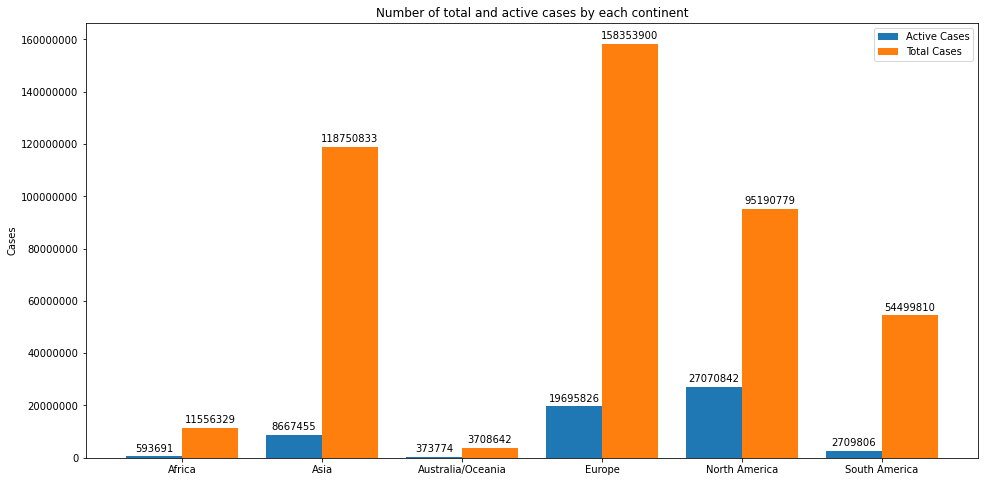

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
labels = active_cases_contient_df['Continent']
x = np.arange(len(labels))
rects1 = ax.bar(x - 0.2, active_cases_contient_df['ActiveCases'], width=0.4, label='Active Cases')
rects2 = ax.bar(x + 0.2, total_cases_contient_df['TotalCases'], width=0.4, label='Total Cases')

# add number for each bar
ax.bar_label(rects1, fmt='%d', padding=3)
ax.bar_label(rects2, fmt='%d', padding=3)
ax.set_ylabel('Cases')
ax.set_title('Number of total and active cases by each continent')
plt.xticks(x, labels)
ax.ticklabel_format(style='plain', axis='y') # remove scientific notation for ticks label
ax.legend()
plt.show()

#### Observation

- The active cases is lower than total cases which is expected as the pacdemic has been hitting us over the course of two year.
- But the number of active cases is still high.

### Is there a relationship between them?

We choose this plot because scatter plot is a great way to see if there is any relationship between variables

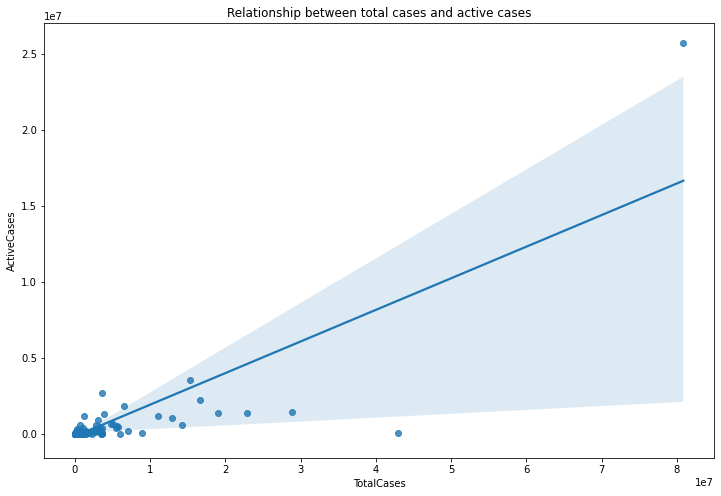

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(data=dfs0, x='TotalCases', y='ActiveCases')
ax.set_title('Relationship between total cases and active cases')
plt.show()

#### Comment

- The graph above suggests that there's a linear relationship between two vairables, and the line is quite steep.

### This time we mark the color for each point based on their contient

Is the corelation of two variables differ from continent to continent?

<Figure size 1152x864 with 0 Axes>

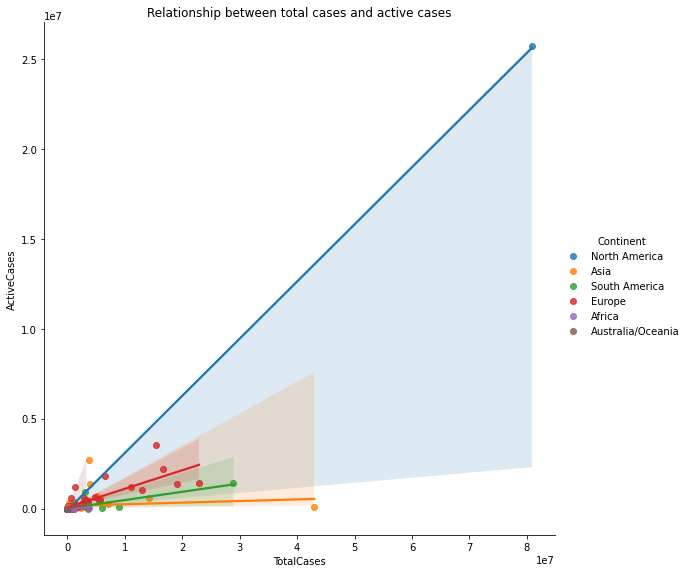

In [ ]:
plt.figure(figsize=(16,12))
# serperate by Continent
sns.lmplot(data=dfs0, x='TotalCases', y='ActiveCases', hue='Continent', height=8)
plt.title('Relationship between total cases and active cases')
plt.show()

#### Comment

- The line for North America is more steep than other continent, this could be explained that one obvious outlier (i.e. USA). Also North America only has 3 countries
- Other continent especially Asia has a rather flat line indicate that they have overcome the peak of the pandemic.
- The pandemic is not over yet, in some countries more and more people is getting infect